In [1]:
import pandas as pd
import numpy as np

In [3]:
# psycopg2 import
import psycopg2
import psycopg2.extras as extras

In [35]:
# server table 확인
connection_info = "host=147.47.200.145 dbname=teamdb16 user=team16 password=qwer16 port=34543"
conn = psycopg2.connect(connection_info)

try:
    # 테이블을 Pandas.Dataframe으로 추출
    server_df = pd.read_sql('SELECT * FROM citation_data',conn)

except psycopg2.Error as e:
    # 데이터베이스 에러 처리
    print("DB error: ", e)
    
finally:
    # 데이터베이스 연결 해제 필수!!
    conn.close()

/tmp/ipykernel_2595913/3039801870.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  server_df = pd.read_sql('SELECT * FROM citation_data',conn)


In [36]:
server_df

,id,title,venue,year,keywords,fos,refer_doc,n_citation,doc_type,abstract
0,53e9b254b7602d9703cf643b,ProtoMol: a molecular dynamics research framew...,International Conference on Computational Science,2003,"{""efficient implementation"",""n-body problem"",""...",Distributed computing,"{53e99a85b7602d97022f72e1,53e9a70bb7602d970303...",5,Conference,This paper describes the design and evaluation...
1,53e9b254b7602d9703cf7469,Optimal task placement to improve cache perfor...,EMSOFT,2007,"{""novel method"",""preempting task"",""current tim...",Distributed computing,"{53e99eb4b7602d970277c454,53e99fa9b7602d970287...",32,Conference,Most recent embedded systems use caches to imp...
2,53e9b254b7602d9703cf753c,Towards a Unified Method of Handling Medium Co...,PDPTA,2006,"{""composition operator"",""petri net""}",Distributed computing,"{53e999d8b7602d970221ed28,53e999e7b7602d970222...",0,Conference,Introducing modularity in order to analyze a n...
3,53e9b254b7602d9703cf7376,Intelligent distributed architecture (IDA) for...,IROS,2009,"{""distributed architecture"",bandwidth,""real ti...",Distributed computing,"{53e9b593b7602d97040d962f,53e99b21b7602d97023b...",0,Conference,"In this paper, we provide a new two-layer scal..."
4,53e9b259b7602d9703cfaf97,Optimized initiation phases for anonymous auct...,Human.Society.Internet,2005,"{""current paper"",""rapid progress"",""efficient a...",Distributed computing,"{558a2ca4e4b031bae1f61a4c,53e99cd8b7602d970258...",0,Conference,Electronic Commerce (EC) has made rapid progre...
...,...,...,...,...,...,...,...,...,...,...
644795,53e9b254b7602d9703cf7844,FNSCSDP: A Forward Node Selection Based Cross-...,Lecture Notes in Computer Science,2006,"{""mobile ad hoc network"",""service discovery pr...",Distributed computing,"{53e99c8bb7602d970253d91a,53e9b4ceb7602d9703fe...",1,Conference,Service discovery is expected to be a crucial ...
644796,53e9b254b7602d9703cf6278,Adaptive workflow scheduling under resource al...,PVLDB,2008,"{""application domain"",""computer-supported coop...",Distributed computing,"{558a30d9e4b031bae1f62fd7,53e9998bb7602d97021c...",48,Journal,Workflow concepts are well suited for scenario...
644797,53e9b254b7602d9703cf6386,Service-Oriented integration of grid applicati...,LSSC,2009,"{""grid service"",""different grids"",""service-ori...",Distributed computing,{53e9a479b7602d9702d991e7},0,Conference,Open Grid Service Architecture (OGSA) is an ar...
644798,53e9b254b7602d9703cf63f3,On-line transportation Scheduling using Spatio...,TIME-ICTL 2003: 10TH INTERNATIONAL SYMPOSIUM O...,2003,"{""multi agent systems"",""dynamic scheduling"",""m...",Distributed computing,"{53e9a584b7602d9702eab10f,53e9a5d3b7602d9702f0...",8,Conference,In this paper we address the problem of the on...


In [37]:
fos_list = server_df['fos'].unique()
fos_list

array(['Distributed computing', 'Mathematics', 'Database',
       'Cloud computing', 'Computation', 'Scalability', 'Multimedia',
       'Embedded system', 'The Internet', 'Machine learning'],
      dtype=object)

In [39]:
input_fos = input() # fos_list 중에 선택하기
input_fos 

Database


'Database'

In [40]:
fos_df = server_df[server_df['fos'] == input_fos]
fos_df.reset_index(inplace = True, drop = True)
fos_df

,id,title,venue,year,keywords,fos,refer_doc,n_citation,doc_type,abstract
0,53e99bc0b7602d970246566f,Prominence prediction for supersentential pros...,SSW,2004,"{""hidden variables"",""database design""}",Database,"{5c78fed34895d9cbc60cbb62,53e997e3b7602d9701fd...",16,Conference,Most current prosodic modeling techniques are ...
1,53e9a0aeb7602d9702998956,Content-Based Browsing In Large News Video Dat...,PROCEEDINGS OF THE FIFTH IASTED INTERNATIONAL ...,2004,"{""content-based retrieval"","" browsing"","" index...",Database,"{558a910384ae84d265be5b08,53e99b3cb7602d97023d...",43,Conference,"In this paper, we have evaluated the effective..."
2,53e9a32eb7602d9702c3b5f2,Modeling and Executing Semantic B2B Integration,RIDE '02 Proceedings of the 12th International...,2002,"{""business proc-esses"",""high number"",""trading ...",Database,"{53e9a500b7602d9702e20189,53e9b0abb7602d9703b1...",27,Conference,Trying to achieve B2B integration by programmi...
3,53e9a5e2b7602d9702f0f666,Folksonomies and science communication: A mash...,Information Services and Use,2007,"{""scientific document"",""specific tag distribut...",Database,"{53e999e7b7602d970222e1fc,53e99af2b7602d970237...",67,Journal,Folksonomies complete the methods of indexing ...
4,53e9a64ab7602d9702f773e2,Mining Purity Dependencies in Databases.,EGC,2002,"{""relational database""}",Database,{53e99e45b7602d9702707376},6,Conference,. We introduce purity dependencies as general...
...,...,...,...,...,...,...,...,...,...,...
19786,5e56424393d709897ccf850c,Hardware-Conscious Stream Processing: A Survey,Special Interest Group on Management of Data,2019,{},Database,"{573698596e3b12023e71ff72,57fdf420654a3f2774ec...",21,Journal,Data stream processing systems (DSPSs) enable ...
19787,5e5e190b93d709897ce49b5e,Ledgerdata Refiner: A Powerful Ledger Data Que...,2019 Sixth International Conference on Interne...,2019,"{blockchain,""Hyperledger Fabric"",""ledger data ...",Database,"{53e99de8b7602d97026a8666,5a9cb66717c44a376ffb...",0,Conference,Blockchain is one of the most popular distribu...
19788,5e67652c91e011e07454bac1,Smoke 100k: A Database for Smoke Detection,2019 IEEE 8th Global Conference on Consumer El...,2019,"{""smoke detection"",""object detection"",""deep le...",Database,"{5a2c9c630cf2a5ba891f9b13,5b67b4b417c44aac1c86...",0,Conference,Due to the complex scenarios and the limited f...
19789,5e68b99d91e0115a6fd942b7,Real-time Communication Measurement on Web Ser...,2019 IEEE International Conference on Internet...,2019,"{Communication,Fingerprint,Measurement,Real-ti...",Database,"{53e9a98eb7602d97032e7e98,573695a36e3b12023e4c...",0,Conference,The problem of fingerprint-based attendance ma...


In [28]:
fos_year = sorted(fos_df['year'].unique(), reverse = True)
fos_year

[2019,
 2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2002,
 2001,
 2000]

In [41]:
from datetime import datetime
from collections import Counter

In [44]:
start = datetime.now()

k = 5 # top k

result = {}
for y in fos_year:
    
    temp_df = fos_df[fos_df['year'] == y]
    temp_df.reset_index(inplace = True, drop = True)

    top_keyword_list = []

    for i in range(len(temp_df)):
        top_keyword_list.extend(temp_df['keywords'][i][1:-1].split(','))

    # 빈 문자열 제거
    top_keyword_list = [t for t in top_keyword_list if t]
    empty_idx = []

    for i in range(len(top_keyword_list)):

        # 소문자 처리 및 "", '' 것들 지우기
        top_keyword_list[i] = top_keyword_list[i].upper()
        top_keyword_list[i] = top_keyword_list[i].replace('"','')
        top_keyword_list[i] = top_keyword_list[i].replace("'","")

        # 빈 문자열 제거
        if top_keyword_list[i] == '':
            empty_idx.append(i)
            continue

        # 앞 뒤로 {, } 들 지우기 (원래 dict 인 것들)
        if top_keyword_list[i][0] == ' ':
            top_keyword_list[i] = top_keyword_list[i][1:]
        if top_keyword_list[i][-1] == ' ':
            top_keyword_list[i] = top_keyword_list[i][:-1]

    for i in empty_idx:
        del top_keyword_list[i]

    temp_dict = dict(Counter(top_keyword_list))
    temp = sorted(temp_dict.items(), key=lambda x: x[1],reverse = True)
    top_keyword_list = temp[:k] # top 10 keyword extraction

    temp_result = {y:top_keyword_list}
#     temp_result = {y:top_keyword_dict}
    result.update(temp_result)

end = datetime.now()

print(f"elapsed time is {end - start}")
print(result)

elapsed time is 0:00:00.227546
{2018: [('NOSQL', 13), ('BIG DATA', 12), ('DATABASES', 11), ('DATABASE', 10), ('DATA MINING', 9)], 2017: [('BIG DATA', 33), ('DATA MINING', 17), ('DATABASE', 14), ('DATABASES', 14), ('ONTOLOGY', 12)], 2016: [('BIG DATA', 27), ('DATA MINING', 18), ('NOSQL', 12), ('MACHINE LEARNING', 12), ('QUERY PROCESSING', 11)], 2015: [('BIG DATA', 40), ('DATABASES', 34), ('DATA MINING', 32), ('QUERY PROCESSING', 27), ('DATABASE', 20)], 2014: [('QUERY PROCESSING', 81), ('BIG DATA', 54), ('INTERNET', 53), ('DATA MINING', 51), ('PERFORMANCE', 40)], 2013: [('DATA MINING', 55), ('WEB SERVICES', 45), ('INTERNET', 45), ('QUERY PROCESSING', 43), ('DATABASE MANAGEMENT SYSTEMS', 37)], 2012: [('DATA MINING', 70), ('DATABASES', 45), ('QUERY PROCESSING', 41), ('WEB SERVICES', 41), ('DATA ANALYSIS', 34)], 2011: [('DATA MINING', 72), ('WEB SERVICE', 60), ('WEB SERVICES', 51), ('DATABASES', 51), ('DATA MODEL', 44)], 2010: [('DATA MINING', 85), ('WEB SERVICE', 69), ('INDEXATION', 66), (

In [45]:
import pandas as pd

idx_list = []
idx = ''


# top k 
for i in range(k):
        idx = 'top' + ' ' + str(i+1)
        idx_list.append(idx)

temp_list = []
y = fos_year[0]
for i in range(len(result[y])):
        temp_temp = list(result[y][i])
        temp_list.append(temp_temp)
result_df = pd.DataFrame(temp_list, columns=[[y,y],['keyword', 'counts']], index = idx_list)
        

# multi column 만들기
for y in fos_year[1:]:
    
    temp_list = []
    
    for i in range(len(result[y])):
        temp_temp = list(result[y][i])
        temp_list.append(temp_temp)
    temp_df = pd.DataFrame(temp_list, columns=[[y,y],['keyword', 'counts']], index = idx_list)
    result_df = pd.concat([result_df, temp_df], axis=1) # column bind

result_df

2018                2017                     2016          
           keyword counts      keyword counts           keyword counts   
top 1        NOSQL     13     BIG DATA     33          BIG DATA     27  \
top 2     BIG DATA     12  DATA MINING     17       DATA MINING     18   
top 3    DATABASES     11     DATABASE     14             NOSQL     12   
top 4     DATABASE     10    DATABASES     14  MACHINE LEARNING     12   
top 5  DATA MINING      9     ONTOLOGY     12  QUERY PROCESSING     11   

                   2015                     2014          
                keyword counts           keyword counts   
top 1          BIG DATA     40  QUERY PROCESSING     81  \
top 2         DATABASES     34          BIG DATA     54   
top 3       DATA MINING     32          INTERNET     53   
top 4  QUERY PROCESSING     27       DATA MINING     51   
top 5          DATABASE     20       PERFORMANCE     40   

                              2013                     2012          
                           keyword counts           keyword counts   
top 1                  DATA MINING     55       DATA MINING     70  \
top 2                 WEB SERVICES     45         DATABASES     45   
top 3                     INTERNET     45  QUERY PROCESSING     41   
top 4             QUERY PROCESSING     43      WEB SERVICES     41   
top 5  DATABASE MANAGEMENT SYSTEMS     37     DATA ANALYSIS     34   

               2011                 2010         
            keyword counts       keyword counts  
top 1   DATA MINING     72   DATA MINING     85  
top 2   WEB SERVICE     60   WEB SERVICE     69  
top 3  WEB SERVICES     51    INDEXATION     66  
top 4     DATABASES     51  SEMANTIC WEB     65  
top 5    DATA MODEL     44     DATABASES     63

In [46]:
from wordcloud import WordCloud

2018


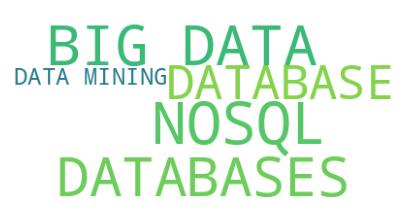

2017


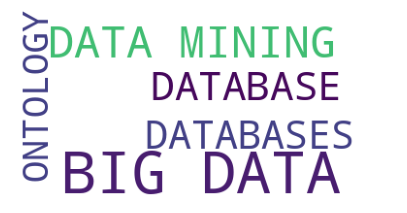

2016


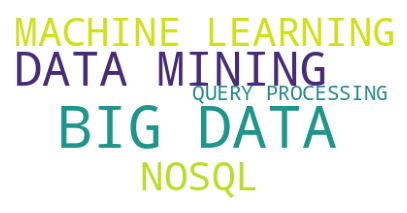

2015


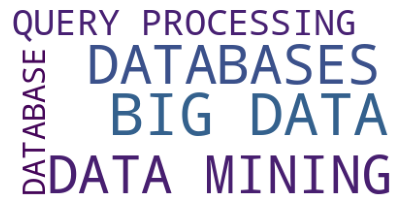

2014


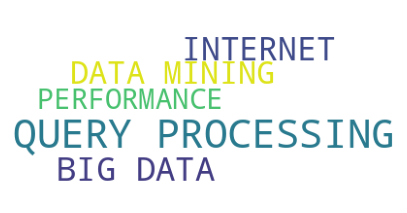

2013


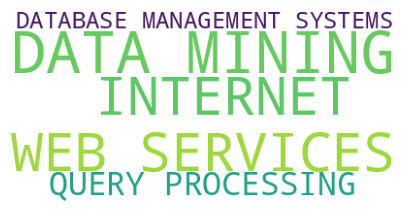

2012


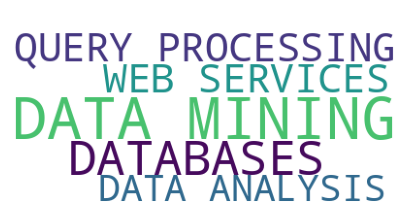

2011


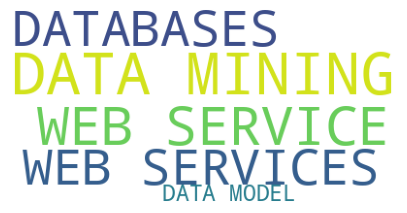

2010


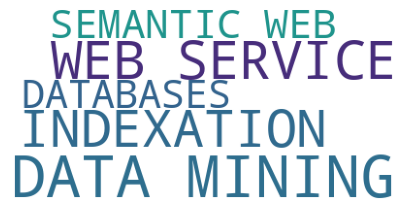

In [50]:
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white", max_font_size=60)

for y in fos_year:
    print(y)
    cloud = wc.generate_from_frequencies(dict(result[y]))
    plt.figure(figsize=(5, 3))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

## 함수로 표현

In [ ]:
fos_list = df['fos'].unique()  이 list에서  fos 뽑기

In [32]:
# 함수로 표현하기


import pandas as pd

def fos_date_range_extractor(df, fos, start_date, end_date, k = 10):
    fos_df = df[df['fos'] == fos]
    fos_df.reset_index(inplace = True, drop = True)
    
    fos_year = sorted(fos_df['year'].unique(), reverse = True)
    
    # find range of year
    
    start = -100
    end = -100
    
    for i in range(len(fos_year)):
        if fos_year[i] == start_date:
            start = i
        elif fos_year[i] == end_date:
            end = i

    fos_year = fos_year[end:start + 1]
    
    return fos_year
    
    
from collections import Counter
def top_k_keyword_extractor(df, fos, fos_year, k = 10):
    fos_df = df[df['fos'] == fos]
    fos_df.reset_index(inplace = True, drop = True)
    
    # create top k keyword dictionary result
    result = {}
    for y in fos_year:
        temp_df = fos_df[fos_df['year'] == y]
        temp_df.reset_index(inplace = True, drop = True)
        top_keyword_list = []
        for i in range(len(temp_df)):
            top_keyword_list.extend(temp_df['keywords'][i][1:-1].split(','))
        # 빈 문자열 제거
        top_keyword_list = [t for t in top_keyword_list if t]
        empty_idx = []
        
        for i in range(len(top_keyword_list)):
            # 소문자 처리 및 "", '' 것들 지우기
            top_keyword_list[i] = top_keyword_list[i].upper()
            top_keyword_list[i] = top_keyword_list[i].replace('"','')
            top_keyword_list[i] = top_keyword_list[i].replace("'","")
            # 빈 문자열 제거
            if top_keyword_list[i] == '':
                empty_idx.append(i)
                continue
            # 앞 뒤로 {, } 들 지우기 (원래 dict 인 것들)
            if top_keyword_list[i][0] == ' ':
                top_keyword_list[i] = top_keyword_list[i][1:]
            if top_keyword_list[i][-1] == ' ':
                top_keyword_list[i] = top_keyword_list[i][:-1]
                
        for i in empty_idx:
            del top_keyword_list[i]
        temp_dict = dict(Counter(top_keyword_list))
        temp = sorted(temp_dict.items(), key=lambda x: x[1],reverse = True)
        top_keyword_list = temp[:k] # top k keyword extraction
        temp_result = {y:top_keyword_list}
        result.update(temp_result)
        
    return result

# create result dataframe view 
def output_view_maker(result, fos_year, k):
    
    idx_list = []
    idx = ''

    # top k 
    for i in range(k):
        idx = 'top' + ' ' + str(i+1)
        idx_list.append(idx)

    temp_list = []
    
    # result initialization
    
    y = fos_year[0]
    
    for i in range(len(result[y])):
        temp_temp = list(result[y][i])
        temp_list.append(temp_temp)
        
    result_df = pd.DataFrame(temp_list, columns=[[y,y],['keyword', 'counts']], index = idx_list)


    # make multi column result df
    for y in fos_year[1:]:

        temp_list = []

        for i in range(len(result[y])):
            temp_temp = list(result[y][i])
            temp_list.append(temp_temp)
        temp_df = pd.DataFrame(temp_list, columns=[[y,y],['keyword', 'counts']], index = idx_list)
        result_df = pd.concat([result_df, temp_df], axis=1) # column bind

    return result_df

In [33]:
result_df

2019                        2018          
                               keyword counts              keyword counts   
top 0                         BIG DATA     11                NOSQL     13  \
top 1                 MACHINE LEARNING      9             BIG DATA     12   
top 2                       BLOCKCHAIN      6            DATABASES     11   
top 3                          ANDROID      4             DATABASE     10   
top 4                   STACK OVERFLOW      4          DATA MINING      9   
top 5                       SMART CITY      3           PROVENANCE      8   
top 6                     WEB SERVICES      3             ONTOLOGY      7   
top 7                      DATA MINING      3      DATA MANAGEMENT      6   
top 8                              IOT      3  EMOTION RECOGNITION      5   
top 9               INTERNET OF THINGS      3         WEB SERVICES      5   
top 10  EMPIRICAL SOFTWARE ENGINEERING      3          LINKED DATA      5   
top 11    MINING SOFTWARE REPOSITORIES      3     MACHINE LEARNING      5   
top 12                        DATABASE      3              ANDROID      4   
top 13                      EVALUATION      2    ASSOCIATION RULES      4   
top 14                        ONTOLOGY      2              PRIVACY      4   

                         2017                          2016          
                      keyword counts                keyword counts   
top 0                BIG DATA     33               BIG DATA     27  \
top 1             DATA MINING     17            DATA MINING     18   
top 2                DATABASE     14                  NOSQL     12   
top 3               DATABASES     14       MACHINE LEARNING     12   
top 4                ONTOLOGY     12       QUERY PROCESSING     11   
top 5             LINKED DATA      9               DATABASE      9   
top 6            SEMANTIC WEB      9            PERFORMANCE      8   
top 7                  SPARQL      9       DATA INTEGRATION      8   
top 8                     RDF      8  INFORMATION RETRIEVAL      8   
top 9                   NOSQL      8            LINKED DATA      7   
top 10                 HADOOP      7              DATABASES      7   
top 11         ACCESS CONTROL      7   RELATIONAL DATABASES      7   
top 12               METADATA      7              MAPREDUCE      7   
top 13          CROWDSOURCING      7                PRIVACY      7   
top 14  INFORMATION RETRIEVAL      6                 HADOOP      7   

                               2015         ...                   2004          
                            keyword counts  ...                keyword counts   
top 0                      BIG DATA     40  ...            DATA MINING     77  \
top 1                     DATABASES     34  ...             INDEXATION     65   
top 2                   DATA MINING     32  ...           SEMANTIC WEB     58   
top 3              QUERY PROCESSING     27  ...            WEB SERVICE     58   
top 4                      DATABASE     20  ...  INFORMATION RETRIEVAL     48   
top 5                           SQL     14  ...               INTERNET     46   
top 6                      ONTOLOGY     12  ...                    XML     46   
top 7                       PRIVACY     12  ...        DATABASE SYSTEM     44   
top 8          RELATIONAL DATABASES     11  ...             DATA MODEL     36   
top 9   DATABASE MANAGEMENT SYSTEMS     11  ...           WEB SERVICES     35   
top 10                 SEMANTIC WEB     11  ...     QUERY OPTIMIZATION     33   
top 11                     INTERNET     11  ...           XML DOCUMENT     32   
top 12        INFORMATION RETRIEVAL     11  ...         QUERY LANGUAGE     31   
top 13             DATA INTEGRATION     11  ...       QUERY PROCESSING     29   
top 14                    SEMANTICS     11  ...    RELATIONAL DATABASE     29   

                         2003                          2002          
                      keyword counts                keyword counts   
top 0          

In [31]:
fos_year = fos_date_range_extractor(server_df, 'Database', 2010, 2018, 10)

result = top_k_keyword_extractor(server_df, 'Database', fos_year, 10)

output_view_maker(result, fos_year, k)

ValueError: Length of values (10) does not match length of index (15)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def Word_cloud_maker(result, fos_year):
    wc = WordCloud(background_color="white", max_font_size=60)
    
    for y in fos_year:
        cloud = wc.generate_from_frequencies(dict(result[y]))
        print(y)
        plt.figure(figsize=(5, 2))
        plt.axis('off')
        plt.imshow(cloud)
        plt.show()

In [ ]:
Word_cloud_maker(result, fos_year)

In [ ]:
# wc = WordCloud(background_color="white", max_font_size=60)

# cloud = wc.generate_from_frequencies(dict(result[2019]))
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 8))
# plt.axis('off')
# plt.imshow(cloud)
# plt.show()